**Корректность проверена на Python 3.7:**
+ numpy 1.14.5

# Доверительные интервалы для доли 

## Генерация данных

In [1]:
import numpy as np

In [2]:
print(np.__version__)

1.19.4


In [3]:
np.random.seed(1)

statistical_population = np.random.randint(2, size = 100000) 

random_sample = np.random.choice(statistical_population, size = 1000)

In [4]:
#истинное значение доли
statistical_population.mean()

0.49771

## Точечная оценка доли

In [6]:
random_sample.mean()

0.502

## Доверительный интервал для доли

In [5]:
from statsmodels.stats.proportion import proportion_confint

### Доверительный интервал на основе нормального распределения

$$\hat{p}\pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}$$

In [7]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')

In [8]:
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.471010, 0.532990] with width 0.061979


### Доверительный интервал Уилсона

$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{
z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 

In [9]:
wilson_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'wilson')

In [10]:
print('wilson_interval [%f, %f] with width %f' % (wilson_interval[0],
                                                  wilson_interval[1],
                                                  wilson_interval[1] - wilson_interval[0]))

wilson_interval [0.471062, 0.532922] with width 0.061860


## Размер выборки для интервала заданной ширины

In [12]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [13]:
n_samples = int(np.ceil(samplesize_confint_proportion(random_sample.mean(), 0.01)))
n_samples

9604

In [14]:
np.random.seed(1)
random_sample = np.random.choice(statistical_population, size = n_samples)

In [15]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')

In [16]:
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1],
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.481776, 0.501773] with width 0.019997


In [43]:
0.02 - (proportion_confint(1, 50, alpha = 0.05, method = 'normal')[1] - 0.02)

-0.018805307081790987

In [45]:
proportion_confint(1, 50, method = 'wilson')[0]

0.003539259271646236

In [50]:
np.ceil(samplesize_confint_proportion(1.0/50, 0.01, method='normal'))

753.0

<AxesSubplot:>

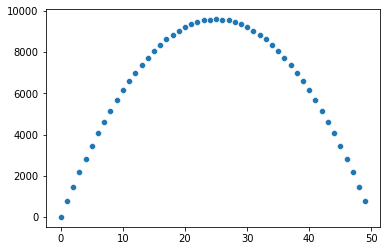

In [52]:
import seaborn as sns
p = [i for i in range(50)]
res = []
for element in p:
    res.append(np.ceil(samplesize_confint_proportion(element/50, 0.01, method='normal')))
sns.scatterplot(x= p, y=res)

In [53]:
z = list(zip(res, p))
z

[(0.0, 0),
 (753.0, 1),
 (1476.0, 2),
 (2167.0, 3),
 (2828.0, 4),
 (3458.0, 5),
 (4057.0, 6),
 (4626.0, 7),
 (5163.0, 8),
 (5670.0, 9),
 (6147.0, 10),
 (6592.0, 11),
 (7007.0, 12),
 (7391.0, 13),
 (7745.0, 14),
 (8068.0, 15),
 (8360.0, 16),
 (8621.0, 17),
 (8851.0, 18),
 (9051.0, 19),
 (9220.0, 20),
 (9358.0, 21),
 (9466.0, 22),
 (9543.0, 23),
 (9589.0, 24),
 (9604.0, 25),
 (9589.0, 26),
 (9543.0, 27),
 (9466.0, 28),
 (9358.0, 29),
 (9220.0, 30),
 (9051.0, 31),
 (8851.0, 32),
 (8621.0, 33),
 (8360.0, 34),
 (8068.0, 35),
 (7745.0, 36),
 (7391.0, 37),
 (7007.0, 38),
 (6592.0, 39),
 (6147.0, 40),
 (5670.0, 41),
 (5163.0, 42),
 (4626.0, 43),
 (4057.0, 44),
 (3458.0, 45),
 (2828.0, 46),
 (2167.0, 47),
 (1476.0, 48),
 (753.0, 49)]